Test with a mnist dataset for the models. 

Import the models and the detaset

In [11]:
import Model
import tensorflow as tf
from tensorflow import keras
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(tf.__version__)
print(tf.keras.__version__)

2.0.0-alpha0
2.2.4-tf


See the dataset information

(60000, 28, 28)


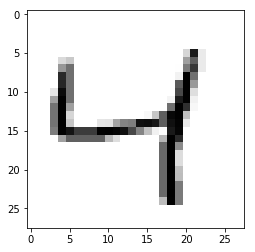

(60000,)
4
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [12]:
%matplotlib inline 
from matplotlib import pyplot as plt

print(x_train.shape)

plt.imshow(x_train[2], cmap='Greys')
plt.show()

print(y_train.shape)

print(y_train[2])

#Reshepe the vector for the network

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

Create the attention model

In [4]:
attentionModel = Model.AttentionModel(10, x_train.shape[1], x_train.shape[2])
attentionModel.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
permute_2 (Permute)             (None, 28, 28, 1)    0           input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 10)   60          permute_2[0][0]                  
__________________________________________________________________________________________________
batch_normalization_v2_6 (Batch (None, 28, 28, 10)   40          conv2d_4[0][0]                   
____________________________________________________________________________________________

Fit the attention model.

In [5]:

attentionModel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

import math
results = attentionModel.fit(x = x_train, y = y_train, batch_size = 32, epochs = 1, use_multiprocessing = True, workers = 4)

60000/60000 [==============================] - 69s 1ms/sample - loss: 0.1958 - sparse_categorical_accuracy: 0.9406


Now test the network

In [6]:
attentionModel.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 380us/sample - loss: 0.0688 - sparse_categorical_accuracy: 0.9779


[0.06880422471500933, 0.9779]

Now try to predict

In [16]:
pred = attentionModel.predict(x_test[55].reshape(1, 28, 28, 1))
print(pred.argmax())
print(y_test[55])

0
0
